In [7]:
#Libro DataSciencie
#Capitulo 1
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]


In [8]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [9]:
for user in users:
    user["friends"]=[]

In [10]:
for i, j in friendships:
    #this works because user[i] is the user whose id is i
    users[i]["friends"].append(users[j]) #add i as a friend of j
    users[j]["friends"].append(users[i]) #add j as a friend of i 


In [11]:
def number_of_friends(user):
    """how many friends does _user_have?"""
    return len(user["friends"]) #lenght of friend_ids_list

total_connections=sum(number_of_friends(user)
                    for user in users) #24
print total_connections

24


In [12]:
from __future__ import division # integer division is lame
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 2.4


In [13]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
for user in users]
sorted(num_friends_by_id, # get it sorted
key=lambda (user_id, num_friends): num_friends, # by num_friends
reverse=True) # largest to smallest
# each pair is (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [14]:
def friends_of_friend_ids_bad(user):
# "foaf" is short for "friend of a friend"
    return [foaf["id"]
        for friend in user["friends"] # for each of user's friends
        for foaf in friend["friends"]] # get each of _their_ friends

In [15]:
print [friend["id"] for friend in users[0]["friends"]] # [1, 2]
print [friend["id"] for friend in users[1]["friends"]] # [0, 2, 3]
print [friend["id"] for friend in users[2]["friends"]] # [0, 1, 3]


[1, 2]
[0, 2, 3]
[0, 1, 3]


In [16]:
from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
        for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
            for friend in user["friends"] # for each of my friends
            for foaf in friend["friends"] # count *their* friends
            if not_the_same(user, foaf) # who aren't me
            and not_friends(user, foaf)) # and aren't my friends

print friends_of_friend_ids(users[3]) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [17]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [18]:
def data_scientists_who_like(target_interest):
    return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]


In [19]:
from collections import defaultdict
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)


In [20]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


In [21]:
def most_common_interests_with(user):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"])
    

In [22]:
#Salaries and experience
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]



In [23]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [24]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [25]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [26]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}


In [28]:
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

In [30]:
#paid account
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
     return "paid"
    elif years_experience < 8.5:
     return "unpaid"
    else:
     return "paid"


In [31]:
#topic of interest
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [37]:
words_and_counts = Counter(word
                            for user, interest in interests
                            for word in interest.lower().split())


In [38]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print word, count


learning 3
java 3
python 3
big 3
data 3
hbase 2
regression 2
cassandra 2
statistics 2
probability 2
hadoop 2
networks 2
machine 2
neural 2
scikit-learn 2
r 2


In [40]:
#Capitulo 2: A crash course in python
for i in [1, 2, 3, 4, 5]:
    print i # first line in "for i" block
    for j in [1, 2, 3, 4, 5]:
        print j # first line in "for j" block
        print i + j # last line in "for j" block
    print i # last line in "for i" block
print "done looping"


1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
done looping


In [48]:
long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10)
long_winded_computation

55

In [49]:
list_of_lists=[[1,2,3],[4,5,6],[7,8,9]]

In [51]:
easier_to_read_list_of_lists=[[1,2,3],
                             [4,5,6],
                             [6,7,8]]

In [52]:
two_plus_three=2+\
                3

In [53]:
for i in [1, 2, 3, 4, 5]:
# notice the blank line
    print i


1
2
3
4
5


In [54]:
import re
my_regex=re.compile("[0-9]+",re.I)

In [58]:
import re as regex
my_regex=regex.compile("[0-9]+",regex.I)

In [60]:
import matplotlib.pyplot as plt


In [61]:
from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()


In [62]:
match = 10
from re import * # uh oh, re has a match function
print match # "<function re.match>"


<function match at 0x000000000361CA58>


In [2]:
from __future__ import division

In [3]:
5/2

2.5

In [4]:
5//2

2

In [19]:
#Functions
def double(x):
    """this is where you put an optional docstring
    that explains what the function does.
    for example, this function multiplies ist input by 2"""
    return x*2

In [20]:
def apply_to_one(f):
    """calls the function f with 1 as ist arguments"""
    return f(1)

my_double = double             #refers to the previously defined function
x = apply_to_one(my_double)    #equals 2

In [23]:
y = apply_to_one(lambda x:x+4) #equals 5

In [25]:
another_double = lambda x:2*x          # don't do this
def another_double(x): return 2*x      # do this instead

In [26]:
def my_print(message="my default message"):
    print message
my_print("hello") # prints 'hello'
my_print() # prints 'my default message' 

hello
my default message


In [27]:
def subtract(a=0, b=0):
    return a - b
subtract(10, 5) # returns 5
subtract(0, 5) # returns -5
subtract(b=5) # same as previous


-5

In [28]:
#String
single_quoted_string = 'data science'
double_quoted_string = "data science"


In [29]:
tab_string = "\t" # represents the tab character
len(tab_string) # is 1


1

In [30]:
not_tab_string = r"\t" # represents the characters '\' and 't'
len(not_tab_string) # is 2

2

In [31]:
multi_line_string = """This is the first line.
and this is the second line
and this is the third line"""

In [33]:
#Excepctions
try:
    print 0 / 0
except ZeroDivisionError:
    print "cannot divide by zero"

cannot divide by zero


In [37]:
#List
integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [ integer_list, heterogeneous_list, [] ]

list_length = len(integer_list) # equals 3
list_sum = sum(integer_list) # equals 6


In [38]:
x = range(10) # is the list [0, 1, ..., 9]
zero = x[0] # equals 0, lists are 0-indexed
one = x[1] # equals 1
nine = x[-1] # equals 9, 'Pythonic' for last element
eight = x[-2] # equals 8, 'Pythonic' for next-to-last element
x[0] = -1 # now x is [-1, 1, 2, 3, ..., 9]

In [39]:
first_three = x[:3] # [-1, 1, 2]
three_to_end = x[3:] # [3, 4, ..., 9]
one_to_four = x[1:5] # [1, 2, 3, 4]
last_three = x[-3:] # [7, 8, 9]
without_first_and_last = x[1:-1] # [1, 2, ..., 8]
copy_of_x = x[:] # [-1, 1, 2, ..., 9]


In [40]:
1 in [1, 2, 3] # True
0 in [1, 2, 3] # False


False

In [41]:
x = [1, 2, 3]
y = x + [4, 5, 6] # y is [1, 2, 3, 4, 5, 6]; x is unchanged


In [42]:
x = [1, 2, 3]
x.append(0) # x is now [1, 2, 3, 0]
y = x[-1] # equals 0
z = len(x) # equals 4

In [43]:
x, y = [1, 2] # now x is 1, y is 2


In [44]:
_, y = [1, 2] # now y == 2, didn't care about the first element

In [46]:
#Tuples
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4
my_list[1] = 3 # my_list is now [1, 3]
try:
    my_tuple[1] = 3
except TypeError:
    print "cannot modify a tuple"

cannot modify a tuple


In [47]:
def sum_and_product(x, y):
    return (x + y),(x * y)
sp = sum_and_product(2, 3) # equals (5, 6)
s, p = sum_and_product(5, 10) # s is 15, p is 50

In [48]:
x, y = 1, 2 # now x is 1, y is 2
x, y = y, x # Pythonic way to swap variables; now x is 2, y is 1

In [51]:
#Dictionaries
empty_dict = {} # Pythonic
empty_dict2 = dict() # less Pythonic
grades = { "Joel" : 80, "Tim" : 95 } # dictionary literal

In [52]:
joels_grade = grades["Joel"] # equals 80


In [53]:
try:
    kates_grade = grades["Kate"]
except KeyError:
    print "no grade for Kate!"

no grade for Kate!


In [54]:
joel_has_grade = "Joel" in grades # True
kate_has_grade = "Kate" in grades # False

In [56]:
joels_grade = grades.get("Joel", 0) # equals 80
kates_grade = grades.get("Kate", 0) # equals 0
no_ones_grade = grades.get("No One") # default default is None


In [57]:
grades["Tim"] = 99 # replaces the old value
grades["Kate"] = 100 # adds a third entry
num_students = len(grades) # equals 3


In [58]:
tweet = {
    "user" : "joelgrus",
    "text" : "Data Science is Awesome",
    "retweet_count" : 100,
    "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}


In [63]:
tweet_keys = tweet.keys() # list of keys
tweet_values = tweet.values() # list of values
tweet_items = tweet.items() # list of (key, value) tuples
"user" in tweet_keys # True, but uses a slow list in
"user" in tweet # more Pythonic, uses faster dict in
"joelgrus" in tweet_values # True


True

In [ ]:
#Defaultdict
word_counts = {}
for word in document:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [ ]:
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

In [ ]:
word_counts = {}
for word in document:
    previous_count = word_counts.get(word, 0)
    word_counts[word] = previous_count + 1

In [ ]:
from collections import defaultdict
word_counts = defaultdict(int) # int() produces 0
for word in document:
word_counts[word] += 1


In [ ]:
dd_list = defaultdict(list) # list() produces an empty list
dd_list[2].append(1) # now dd_list contains {2: [1]}

dd_dict = defaultdict(dict) # dict() produces an empty dict
dd_dict["Joel"]["City"] = "Seattle" # { "Joel" : { "City" : Seattle"}}

dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1 # now dd_pair contains {2: [0,1]}

In [89]:
#Counter
from collections import Counter
c = Counter([0, 1, 2, 0]) # c is (basically) { 0 : 2, 1 : 1, 2 : 1 }

In [ ]:
word_counts = Counter(document)

In [ ]:
# print the 10 most common words and their counts
for word, count in word_counts.most_common(10):
print word, count

In [92]:
#Sets
s = set()
s.add(1) # s is now { 1 }
s.add(2) # s is now { 1, 2 }
s.add(2) # s is still { 1, 2 }
x = len(s) # equals 2
y = 2 in s # equals True
z = 3 in s # equals False


In [ ]:
stopwords_list = ["a","an","at"] + hundreds_of_other_words + ["yet", "you"]

"zip" in stopwords_list # False, but have to check every element

stopwords_set = set(stopwords_list)
"zip" in stopwords_set # very fast to check

In [94]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list) # 6
item_set = set(item_list) # {1, 2, 3}
num_distinct_items = len(item_set) # 3
distinct_item_list = list(item_set) # [1, 2, 3]

In [95]:
#Control Flow
if 1 > 2:
    message = "if only 1 were greater than two…"
elif 1 > 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"

In [96]:
parity = "even" if x % 2 == 0 else "odd"


In [99]:
x = 0
while x < 10:
    print x, "is less than 10"
    x += 1


0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [100]:
for x in range(10):
    print x, "is less than 10"

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [101]:
for x in range(10):
    if x == 3:
        continue  # go immediately to the next iteration
    if x == 5:
        break     # quit the loop entirely
    print x


0
1
2
4


In [102]:
#Truthiness
one_is_less_than_two = 1 < 2 # equals True
true_equals_false = True == False # equals False

In [103]:
x = None
print x == None # prints True, but is not Pythonic
print x is None # prints True, and is Pythonic


True
True


In [ ]:
s = some_function_that_returns_a_string()
if s:
    first_char = s[0]
else:
    first_char = ""

In [ ]:
first_char = s and s[0]


In [ ]:
safe_x = x or 0all([True, 1, { 3 }]) # True
all([True, 1, {}]) # False, {} is falsy
any([True, 1, {}]) # True, True is truthy
all([]) # True, no falsy elements in the list
any([]) # False, no truthy elements in the list

In [105]:
#The Not-So-Basics
#Sorting
x = [4,1,2,3]
y = sorted(x) # is [1,2,3,4], x is unchanged
x.sort() # now x is [1,2,3,4]


In [106]:
# sort the list by absolute value from largest to smallest
x = sorted([-4,1,-2,3], key=abs, reverse=True) # is [-4,3,-2,1]
# sort the words and counts from highest count to lowest
wc = sorted(word_counts.items(),
            key=lambda (word, count): count,
            reverse=True)

In [107]:
#List comprehensions
even_numbers = [x for x in range(5) if x % 2 == 0] # [0, 2, 4]
squares = [x * x for x in range(5)] # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers] # [0, 4, 16]


In [108]:
square_dict = { x : x * x for x in range(5) } # { 0:0, 1:1, 2:4, 3:9, 4:16 }
square_set = { x * x for x in [1, -1] } # { 1 }

In [109]:
zeroes = [0 for _ in even_numbers] # has the same length as even_numbers

In [110]:
pairs = [(x, y)
            for x in range(10)
            for y in range(10)] # 100 pairs (0,0) (0,1) ... (9,8), (9,9)

In [111]:
increasing_pairs = [(x, y) # only pairs with x < y,
                    for x in range(10) # range(lo, hi) equals
                    for y in range(x + 1, 10)] # [lo, lo + 1, ..., hi - 1]

In [112]:
#Generators and Iterators
def lazy_range(n):
    """a lazy version of range"""
    i = 0
    while i < n:
        yield i
        i += 1


In [ ]:
for i in lazy_range(10):
    do_something_with(i)

In [ ]:
def natural_numbers():
    """returns 1, 2, 3, ..."""
    n = 1
    while True:
        yield n
        n += 1


In [ ]:
lazy_evens_below_20 = (i for i in lazy_range(20) if i % 2 == 0)

In [114]:
#Randomness
import random
four_uniform_randoms = [random.random() for _ in range(4)]
# [0.8444218515250481, # random.random() produces numbers
# 0.7579544029403025, # uniformly between 0 and 1
# 0.420571580830845, # it's the random function we'll use
# 0.25891675029296335] # most often


In [115]:
random.seed(10) # set the seed to 10
print random.random() # 0.57140259469
random.seed(10) # reset the seed to 10
print random.random() # 0.57140259469 again

0.57140259469
0.57140259469


In [116]:
random.randrange(10) # choose randomly from range(10) = [0, 1, ..., 9]
random.randrange(3, 6) # choose randomly from range(3, 6) = [3, 4, 5]

4

In [117]:
up_to_ten = range(10)
random.shuffle(up_to_ten)
print up_to_ten
# [2, 5, 1, 9, 7, 3, 8, 6, 4, 0] (your results will probably be different)

[8, 3, 5, 1, 9, 0, 4, 6, 7, 2]


In [118]:
my_best_friend = random.choice(["Alice", "Bob", "Charlie"]) # "Bob" for me


In [119]:
lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6) # [16, 36, 10, 6, 25, 9]

In [120]:
four_with_replacement = [random.choice(range(10))
for _ in range(4)]
# [9, 4, 4,2] 

In [121]:
#Regular expressions
import re
print all([ # all of these are true, because
    not re.match("a", "cat"), # * 'cat' doesn't start with 'a'
    re.search("a", "cat"), # * 'cat' has an 'a' in it
    not re.search("c", "dog"), # * 'dog' doesn't have a 'c' in it
    3 == len(re.split("[ab]", "carbs")), # * split on a or b to ['c','r','s']
    "R-D-" == re.sub("[0-9]", "-", "R2D2") # * replace digits with dashes
    ]) # prints True

True


In [123]:
#Object-Oriented Programming
# by convention, we give classes PascalCase names
class Set:
    # these are the member functions
    # every one takes a first parameter "self" (another convention)
    # that refers to the particular Set object being used
    def __init__(self, values=None):
        """This is the constructor.
        It gets called when you create a new Set.
        You would use it like
        s1 = Set() # empty set
        s2 = Set([1,2,2,3]) # initialize with values"""
        self.dict = {} # each instance of Set has its own dict property
        # which is what we'll use to track memberships
        if values is not None:
            for value in values:
                self.add(value)
    def __repr__(self):
        """this is the string representation of a Set object
        if you type it at the Python prompt or pass it to str()"""
        return "Set: " + str(self.dict.keys())
    # we'll represent membership by being a key in self.dict with value True
    def add(self, value):
        self.dict[value] = True
    # value is in the Set if it's a key in the dictionary
    def contains(self, value):
        return value in self.dict
    def remove(self, value):
        del self.dict[value]


In [124]:
s = Set([1,2,3])
s.add(4)
print s.contains(4) # True
s.remove(3)
print s.contains(3) # False

True
False


In [125]:
#Functional Tools
def exp(base, power):
    return base ** power

In [126]:
def two_to_the(power):
    return exp(2, power)

In [127]:
from functools import partial
two_to_the = partial(exp, 2) # is now a function of one variable
print two_to_the(3) # 8


8


In [128]:
square_of = partial(exp, power=2)
print square_of(3) # 9

9


In [129]:
def double(x):
    return 2 * x
xs = [1, 2, 3, 4]
twice_xs = [double(x) for x in xs] # [2, 4, 6, 8]
twice_xs = map(double, xs) # same as above
list_doubler = partial(map, double) # *function* that doubles a list
twice_xs = list_doubler(xs) # again [2, 4, 6, 8]

In [130]:
def multiply(x, y): return x * y
products = map(multiply, [1, 2], [4, 5]) # [1 * 4, 2 * 5] = [4, 10]


In [131]:
def is_even(x):
    """True if x is even, False if x is odd"""
    return x % 2 == 0
x_evens = [x for x in xs if is_even(x)] # [2, 4]
x_evens = filter(is_even, xs) # same as above
list_evener = partial(filter, is_even) # *function* that filters a list
x_evens = list_evener(xs) # again [2, 4]

In [132]:
x_product = reduce(multiply, xs) # = 1 * 2 * 3 * 4 = 24
list_product = partial(reduce, multiply) # *function* that reduces a list
x_product = list_product(xs) # again = 24

In [ ]:
#Enumerate
# not Pythonic
for i in range(len(documents)):
    document = documents[i]
    do_something(i, document)
# also not Pythonic
i = 0
for document in documents:
    do_something(i, document)
    i += 1

In [ ]:
for i, document in enumerate(documents):
    do_something(i, document)
    

In [ ]:
for i in range(len(documents)): do_something(i) # not Pythonic
for i, _ in enumerate(documents): do_something(i) # Pythonic


In [136]:
#Zip and Arguments Unpacking
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]
zip(list1, list2) # is [('a', 1), ('b', 2), ('c', 3)]

[('a', 1), ('b', 2), ('c', 3)]

In [137]:
pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs)

In [138]:
zip(('a', 1), ('b', 2), ('c', 3))

[('a', 'b', 'c'), (1, 2, 3)]

In [ ]:
def add(a, b): return a + b
add(1, 2) # returns 3
add([1, 2]) # TypeError!
add(*[1, 2]) # returns 3

In [140]:
#Args and kwargs
def doubler(f):
    def g(x):
        return 2 * f(x)
    return g


In [141]:
def f1(x):
    return x + 1
g = doubler(f1)
print g(3) # 8 (== ( 3 + 1) * 2)
print g(-1) # 0 (== (-1 + 1) * 2)

8
0


In [ ]:
def f2(x, y):
    return x + y
g = doubler(f2)
print g(1, 2) # TypeError: g() takes exactly 1 argument (2 given)

In [ ]:
def magic(*args, **kwargs):
    print "unnamed args:", args
    print "keyword args:", kwargs
magic(1, 2, key="word", key2="word2")
# prints
# unnamed args: (1, 2)
# keyword args: {'key2': 'word2', 'key': 'word'}

In [ ]:
def other_way_magic(x, y, z):
    return x + y + z
x_y_list = [1, 2]
z_dict = { "z" : 3 }
print other_way_magic(*x_y_list, **z_dict) # 6

In [144]:
def doubler_correct(f):
    """works no matter what kind of inputs f expects"""
    def g(*args, **kwargs):
        """whatever arguments g is supplied, pass them through to f"""
        return 2 * f(*args, **kwargs)
    return g

g = doubler_correct(f2)
print g(1, 2) # 6

6


In [8]:
#Chapter 3. Visualizing Data
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


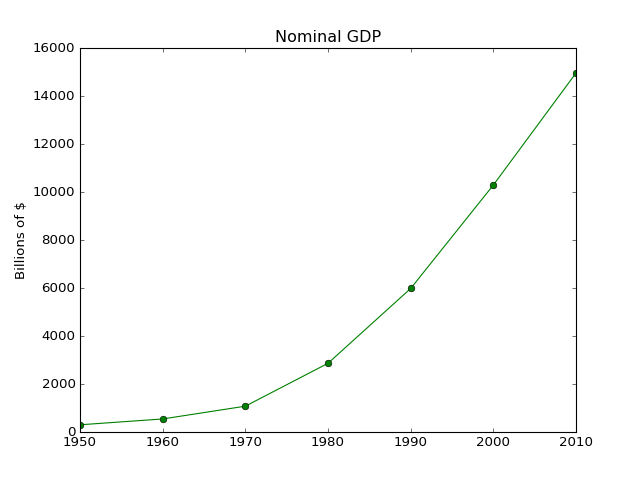

In [29]:
import matplotlib.pyplot as plt
%matplotlib notebook
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()


<IPython.core.display.Javascript object>


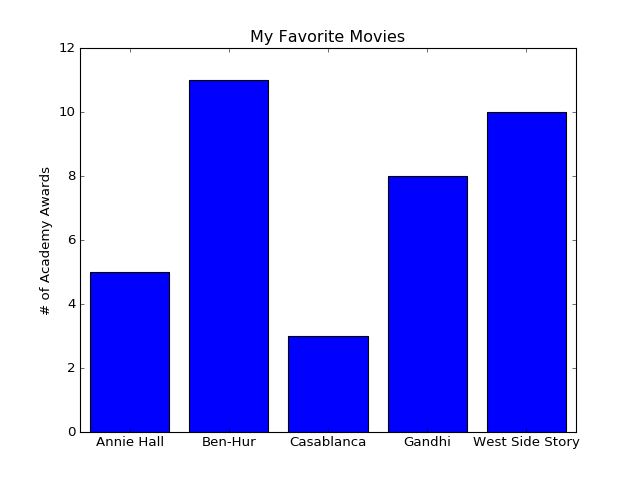

In [37]:
#Bar Charts
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

In [58]:
import matplotlib.pyplot as plt
from collections import Counter
    

In [59]:
def make_chart_histogram(plt):
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10 
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

<IPython.core.display.Javascript object>


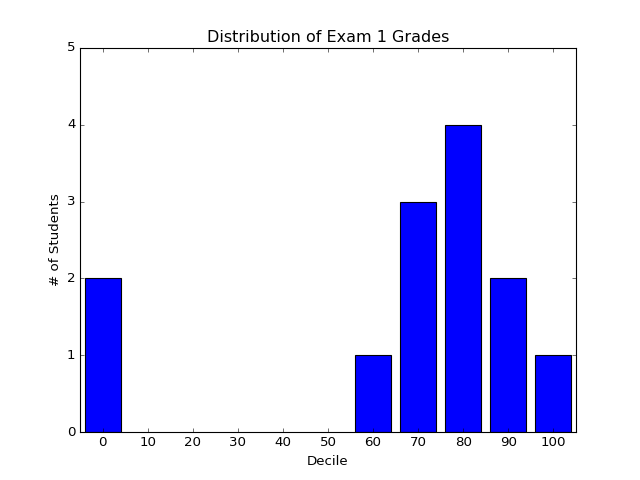

In [60]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
histogram.values(), # give each bar its correct height
8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
# y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

<IPython.core.display.Javascript object>


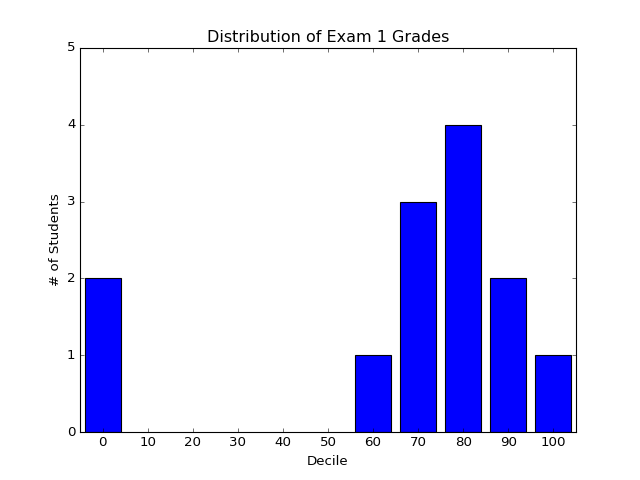

In [65]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()],    # shift each bar to the left by 4
        histogram.values(),                   # give each bar its correct height
        8)                                    # give each bar a width of 8

plt.axis([-5, 105, 0, 5])                     # x-axis from -5 to 105,
                                              # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])       # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()


<IPython.core.display.Javascript object>


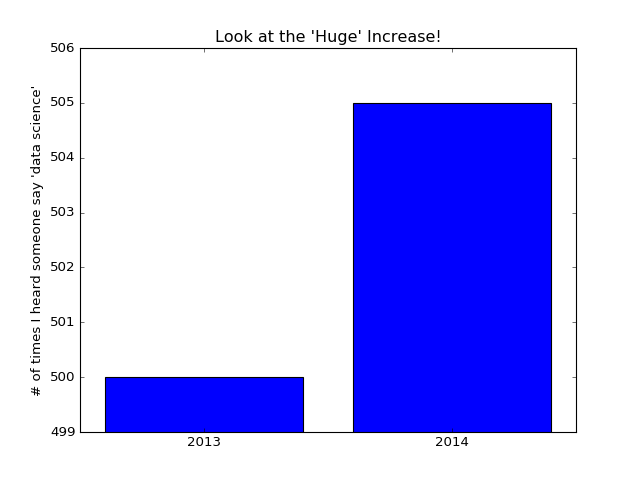

In [66]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()


In [ ]:
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

<IPython.core.display.Javascript object>


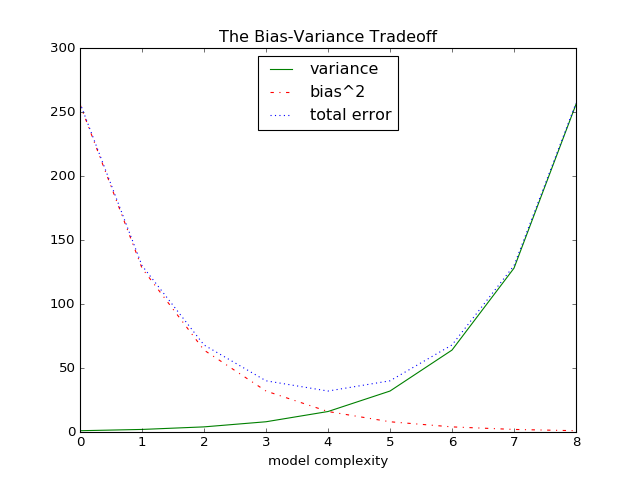

In [69]:
#Line Charts
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()


<IPython.core.display.Javascript object>


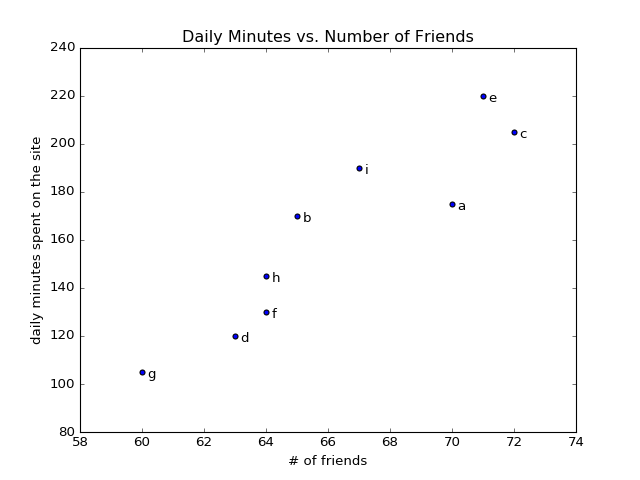

In [70]:
#scartterplots
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # put the label with its point
        xytext=(5, -5), # but slightly offset
        textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

<IPython.core.display.Javascript object>


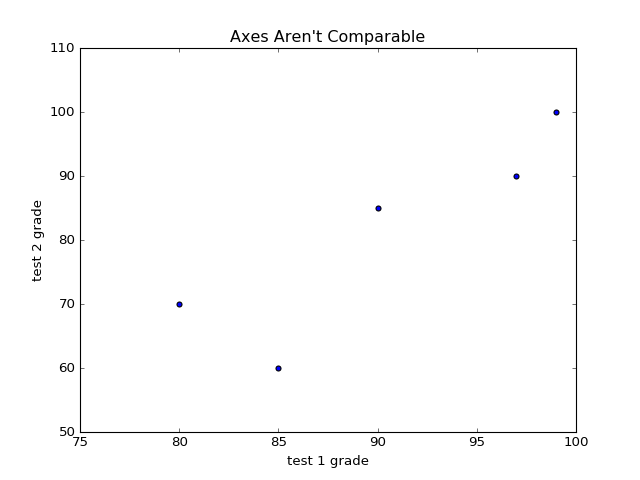

In [71]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()


In [73]:
#Chapter 9. Getting Data
#stdin and stdout
# egrep.py
import sys, re
# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]
# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

In [75]:
# line_count.py
import sys
count = 0
for line in sys.stdin:
    count += 1
# print goes to sys.stdout
print count

0


In [ ]:
type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py 

In [ ]:
# most_common_words.py
import sys
from collections import Counter

if __name__ == "__main__":

    # pass in number of words as first argument
    try:
        num_words = int(sys.argv[1])
    except:
        print "usage: most_common_words.py num_words"
        sys.exit(1)   # non-zero exit code indicates error

    counter = Counter(word.lower()                      
                      for line in sys.stdin             
                      for word in line.strip().split()  
                      if word)                          
            
    for word, count in counter.most_common(num_words):
        sys.stdout.write(str(count))
        sys.stdout.write("\t")
        sys.stdout.write(word)
        sys.stdout.write("\n")

In [ ]:
#Reading Files
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')
# 'w' is write—will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')
# 'a' is append—for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')
# don't forget to close your files when you're done
file_for_writing.close()

In [ ]:
with open(filename,'r') as f:
data = function_that_gets_data_from(f)
# at this point f has already been closed, so don't try to use it
process(data)

In [ ]:
starts_with_hash = 0
with open('input.txt','r') as f:
    for line in file: # look at each line in the file
        if re.match("^#",line): # use a regex to see if it starts with '#'
            starts_with_hash += 1 # if it does, add 1 to the count

In [ ]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

In [ ]:
#Delimited Files
import csv
with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)


In [ ]:
with open('colon_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

In [ ]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }
with open('comma_delimited_stock_prices.txt','wb') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])


In [99]:
results = [["test1", "success", "Monday"],
          ["test2", "success, kind of", "Tuesday"],
          ["test3", "failure, kind of", "Wednesday"],
          ["test4", "failure, utter", "Thursday"]]
# don't do this!
with open('bad_csv.txt', 'wb') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n") # row might have newlines as well!

In [ ]:
test1,success,Monday
test2,success, kind of,Tuesday
test3,failure, kind of,Wednesday
test4,failure, utter,Thursday

In [94]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [96]:
first_paragraph = soup.find('p') # or just soup.p

In [102]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()


In [ ]:
first_paragraph_id = soup.p['id'] # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') # returns None if no 'id'

In [103]:
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]


In [104]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                        if 'important' in p.get('class', [])]


In [105]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                    for div in soup('div') # for each <div> on the page
                    for span in div('span')] # find each <span> inside it


In [106]:
#example O'Relly Books about Data
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
        "data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')


In [ ]:
<td class="thumbtext">
    <div class="thumbcontainer">
        <div class="thumbdiv">
            <a href="/product/9781118903407.do">
                <img src="..."/>
            </a>
        </div>
    </div>
    <div class="widthchange">
        <div class="thumbheader">
            <a href="/product/9781118903407.do">Getting a Big Data Job For Dummies</a>
        </div>
        <div class="AuthorName">By Jason Williamson</div>
        <span class="directorydate"> December 2014 </span>
        <div style="clear:both;">
            <div id="146350">
                <span class="pricelabel">
                                    Ebook:
                                    <span class="price">&nbsp;$29.99</span>
                </span>
            </div>
        </div>
    </div>
</td>


In [ ]:
tds = soup('td', 'thumbtext')
print len(tds)
# 30


In [ ]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))
print len([td for td in tds if not is_video(td)])
# 21 for me, might be different for you


In [ ]:
title = td.find("div", "thumbheader").a.text


In [ ]:
author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]


In [ ]:
isbn_link = td.find("div", "thumbheader").a.get("href")
# re.match captures the part of the regex in parentheses
isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

In [ ]:
date = td.find("span", "directorydate").text.strip()

In [ ]:
def book_info(td):
    """given a BeautifulSoup <td> Tag representing a book,
    extract the book's details and return a dict"""
    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()
    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
}

In [ ]:
from bs4 import BeautifulSoup
import requests
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page="
books = []
NUM_PAGES = 31 # at the time of writing, probably more by now
for page_num in range(1, NUM_PAGES + 1):
    print "souping page", page_num, ",", len(books), " found so far"
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
    # now be a good citizen and respect the robots.txt!
    sleep(30)

In [ ]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])
# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2014)
import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [ ]:
#Using API
#JSON (and XML)
{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2014,
"topics" : [ "data", "science", "data science"] }


In [ ]:
import json
serialized = """{ "title" : "Data Science Book",
                    "author" : "Joel Grus",
                    "publicationYear" : 2014,
                    "topics" : [ "data", "science", "data science"] }"""
# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print deserialized

In [ ]:
<Book>
    <Title>Data Science Book</Title>
    <Author>Joel Grus</Author>
    <PublicationYear>2014</PublicationYear>
    <Topics>
        <Topic>data</Topic>
        <Topic>science</Topic>
        <Topic>data science</Topic>
    </Topic
</Book>

In [ ]:
#Using and Unauthenticated API
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"
repos = json.loads(requests.get(endpoint).text)


In [ ]:
u'created_at': u'2013-07-05T02:02:28Z'


In [ ]:
pip install python-dateutil

In [ ]:
from dateutil.parser import parse
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)


In [ ]:
last_5_repositories = sorted(repos,
                                key=lambda r: r["created_at"],
                                reverse=True)[:5]
last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

In [ ]:
#Finding APIs
#Example
from twython import Twython
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)
# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print user, ":", text
    print

In [ ]:
haithemnyc: Data scientists with the technical savvy &amp; analytical chops to
derive meaning from big data are in demand. http://t.co/HsF9Q0dShP
RPubsRecent: Data Science http://t.co/6hcHUz2PHM
spleonard1: Using #dplyr in #R to work through a procrastinated assignment for
@rdpeng in @coursera data science specialization. So easy and Awesome.


In [ ]:
from twython import TwythonStreamer
# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []
class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""
    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python dict representing a tweet"""
        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)
            print "received tweet #", len(tweets)
        # stop when we've collected enough
        if len(tweets) >= 1000:
            self.disconnect()
    def on_error(self, status_code, data):
        print status_code, data
        self.disconnect()

In [ ]:
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')
# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

In [ ]:
top_hashtags = Counter(hashtag['text'].lower()
                        for tweet in tweets
                        for hashtag in tweet["entities"]["hashtags"])
print top_hashtags.most_common(5)

In [12]:
#Chapter 10
#Working with Data
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [ ]:
random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
            for _ in range(10000)]

In [ ]:
plot_histogram(uniform, 10, "Uniform Histogram")


In [ ]:
plot_histogram(normal, 10, "Normal Histogram")

In [ ]:
#two dimensions
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

In [ ]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()


In [ ]:
print correlation(xs, ys1) # 0.9
print correlation(xs, ys2) # -0.9

In [32]:
#Many Dimensions
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    return make_matrix(num_columns, num_columns, matrix_entry)

In [ ]:
import matplotlib.pyplot as plt
__,num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)
for i in range(num_columns):
    for j in range(num_columns):
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [ ]:
#Cleaning and Munging
closing_price = float(row[2])


In [ ]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
        for value, parser in zip(input_row, parsers)]
def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

In [ ]:
def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none


In [ ]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
        6/20/2014,AAPL,90.91
#6/20/2014,MSFT,41.68
#6/20/3014,FB,64.5
#6/19/2014,AAPL,91.86
#6/19/2014,MSFT,n/a
#6/19/2014,FB,64.34for value, parser in zip(input_row, parsers)]

In [ ]:
import dateutil.parser
data = []
with open("comma_delimited_stock_prices.csv", "rb") as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

In [ ]:
for row in data:
    if any(x is None for x in row):
        print row


In [ ]:
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
        for field_name, value in input_dict.iteritems() }


In [ ]:
#Manipulanding Data
data = [
        {'closing_price': 102.06,
        'date': datetime.datetime(2014, 8, 29, 0, 0),
        'symbol': 'AAPL'},
        # ...
]

In [ ]:
# group rows by symbol
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)
# use a dict comprehension to find the max for each symbol
max_price_by_symbol = { symbol : max(row["closing_price"]
                                    for row in grouped_rows)
                        for symbol, grouped_rows in by_symbol.iteritems() }

In [ ]:
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]
def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)


In [ ]:
def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                for key, rows in grouped.iteritems() }

In [ ]:
max_price_by_symbol = group_by(picker("symbol"),
                                data,
                                lambda rows: max(pluck("closing_price", rows)))

In [ ]:
def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1
def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
            "date" : today["date"],
            "change" : percent_price_change(yesterday, today) }
        

In [ ]:
# key is symbol, value is list of "change" dicts
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)
# collect all "change" dicts into one big list
all_changes = [change
            for changes in changes_by_symbol.values()
            for change in changes]
            for yesterday, today in zip(ordered, ordered[1:])]

In [ ]:
max(all_changes, key=picker("change"))
# {'change': 0.3283582089552237,
# 'date': datetime.datetime(1997, 8, 6, 0, 0),
# 'symbol': 'AAPL'}
# see, e.g. http://news.cnet.com/2100-1001-202143.html
min(all_changes, key=picker("change"))
# {'change': -0.5193370165745856,
# 'date': datetime.datetime(2000, 9, 29, 0, 0),
# 'symbol': 'AAPL'}
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/

In [ ]:
# to combine percent changes, we add 1 to each, multiply them, and subtract 1
# for instance, if we combine +10% and -20%, the overall change is
# (1 + 10%) * (1 - 20%) - 1 = 1.1 * .8 - 1 = -12%
def combine_pct_changes(pct_change1, pct_change2):
    return (1 + pct_change1) * (1 + pct_change2) - 1
def overall_change(changes):
    return reduce(combine_pct_changes, pluck("change", changes))
overall_change_by_month = group_by(lambda row: row['date'].month,
                                    all_changes,
                                    overall_change)

In [ ]:
#Rescaling
a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171]) # 11.40

In [ ]:
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37

In [ ]:
def scale(data_matrix):
    """returns the means and standard deviations of each column"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
        for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
        for j in range(num_cols)]
    return means, stdevs


In [ ]:
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    leaves alone columns with no deviation"""
    means, stdevs = scale(data_matrix)
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

In [ ]:
#Dimensionality Reduction
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean
    value of its column. the resulting matrix has mean 0 in every column"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [ ]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [ ]:
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w"""
    return dot(x_i, direction(w)) ** 2
def directional_variance(X, w):
    """the variance of the data in the direction determined w"""
    return sum(directional_variance_i(x_i, w)
        for x_i in X)

In [ ]:
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of
    the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w)
                    for x_i in X)


In [ ]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X), # is now a function of w
        partial(directional_variance_gradient, X), # is now a function of w
        guess)
    return direction(unscaled_maximizer)


In [ ]:
# here there is no "y", so we just pass in a vector of Nones
# and functions that ignore that input
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X,
        [None for _ in X], # the fake "y"
        guess)
    return direction(unscaled_maximizer)


In [ ]:
def project(v, w):
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)


In [ ]:
def remove_projection_from_vector(v, w):
    """projects v onto w and subtracts the result from v"""
    return vector_subtract(v, project(v, w))
def remove_projection(X, w):
    """for each row of X
    projects the row onto w, and subtracts the result from the row"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]

In [ ]:
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)
    return components

In [ ]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]


In [40]:
#Chapter 24
#Map Reduce
def word_count_old(documents):
    """word count not using MapReduce"""
    return Counter(word
        for document in documents
        for word in tokenize(document))



In [41]:
def wc_mapper(document):
    """for each word in the document, emit (word,1)"""
    for word in tokenize(document):
        yield (word, 1)


In [42]:
def wc_reducer(word, counts):
    """sum up the counts for a word"""
    yield (word, sum(counts))

In [43]:
def word_count(documents):
    """count the words in the input documents using MapReduce"""
    # place to store grouped values
    collector = defaultdict(list)
    for document in documents:
        for word, count in wc_mapper(document):
            collector[word].append(count)
    return [output
            for word, counts in collector.iteritems()
            for output in wc_reducer(word, counts)]

In [44]:
{ "data" : [1, 1],
"science" : [1, 1],
"big" : [1],
"fiction" : [1] }

{'big': [1], 'data': [1, 1], 'fiction': [1], 'science': [1, 1]}

In [45]:
[("data", 2), ("science", 2), ("big", 1), ("fiction", 1)]

[('data', 2), ('science', 2), ('big', 1), ('fiction', 1)]

In [46]:
#Why MapReduce?
#MapReduce More Generally
def map_reduce(inputs, mapper, reducer):
    """runs MapReduce on the inputs using mapper and reducer"""
    collector = defaultdict(list)
    for input in inputs:
        for key, value in mapper(input):
            collector[key].append(value)
    return [output
        for key, values in collector.iteritems()
        for output in reducer(key,values)]


In [ ]:
word_counts = map_reduce(documents, wc_mapper, wc_reducer)

In [48]:
def reduce_values_using(aggregation_fn, key, values):
    """reduces a key-values pair by applying aggregation_fn to the values"""
    yield (key, aggregation_fn(values))
def values_reducer(aggregation_fn):
    """turns a function (values -> output) into a reducer
    that maps (key, values) -> (key, output)"""
    return partial(reduce_values_using, aggregation_fn)

In [ ]:
sum_reducer = values_reducer(sum)
max_reducer = values_reducer(max)
min_reducer = values_reducer(min)
count_distinct_reducer = values_reducer(lambda values: len(set(values)))

In [52]:
#Example: Analyzing Status Updates
{"id": 1,
    "username" : "joelgrus",
    "text" : "Is anyone interested in a data science book?",
    #"created_at" : datetime.datetime(2013, 12, 21, 11, 47, 0),
    "liked_by" : ["data_guy", "data_gal", "mike"] }


{'id': 1,
 'liked_by': ['data_guy', 'data_gal', 'mike'],
 'text': 'Is anyone interested in a data science book?',
 'username': 'joelgrus'}

In [ ]:
def data_science_day_mapper(status_update):
    """yields (day_of_week, 1) if status_update contains "data science" """
    if "data science" in status_update["text"].lower():
        day_of_week = status_update["created_at"].weekday()
        yield (day_of_week, 1)
data_science_days = map_reduce(status_updates,
                                data_science_day_mapper,
                                sum_reducer)

In [ ]:
def words_per_user_mapper(status_update):
    user = status_update["username"]
    for word in tokenize(status_update["text"]):
        yield (user, (word, 1))
def most_popular_word_reducer(user, words_and_counts):
    """given a sequence of (word, count) pairs,
    return the word with the highest total count"""
    word_counts = Counter()
    for word, count in words_and_counts:
        word_counts[word] += count
    word, count = word_counts.most_common(1)[0]
    yield (user, (word, count))
user_words = map_reduce(status_updates,
                        words_per_user_mapper,
                        most_popular_word_reducer)


In [ ]:
def liker_mapper(status_update):
    user = status_update["username"]
    for liker in status_update["liked_by"]:
        yield (user, liker)
distinct_likers_per_user = map_reduce(status_updates,
                                        liker_mapper,
                                        count_distinct_reducer)

In [56]:
#Example de Matrix de Multiplicación
def matrix_multiply_mapper(m, element):
    """m is the common dimension (columns of A, rows of B)
    element is a tuple (matrix_name, i, j, value)"""
    name, i, j, value = element
    if name == "A":
        # A_ij is the jth entry in the sum for each C_ik, k=1..m
        for k in range(m):
            # group with other entries for C_ik
            yield((i, k), (j, value))
    else:
        # B_ij is the i-th entry in the sum for each C_kj
        for k in range(m):
            # group with other entries for C_kj
            yield((k, j), (i, value))
def matrix_multiply_reducer(m, key, indexed_values):
    results_by_index = defaultdict(list)
    for index, value in indexed_values:
        results_by_index[index].append(value)
    # sum up all the products of the positions with two results
    sum_product = sum(results[0] * results[1]
                        for results in results_by_index.values()
                        if len(results) == 2)
    if sum_product != 0.0:
        yield (key, sum_product)
    

In [57]:
A = [[3, 2, 0],
[0, 0, 0]]
B = [[4, -1, 0],
[10, 0, 0],
[0, 0, 0]]

In [ ]:
entries = [("A", 0, 0, 3), ("A", 0, 1, 2),
            ("B", 0, 0, 4), ("B", 0, 1, -1), ("B", 1, 0, 10)]
#mapper = partial(matrix_multiply_mapper, 3)
reducer = partial(matrix_multiply_reducer, 3)
map_reduce(entries, mapper, reducer) # [((0, 1), -3), ((0, 0), 32)]